# Dictionaries
* Read DNA sequences from file, and calculate frequency of occurence per base.

In [54]:
def my_count(dna, base):
    i = 0 # counter
    for c in dna:
        if c == base:
            i += 1 # i = i + 1
    return i


In [88]:
r = my_count("GAAT",'A')
print(r)
#print(my_count("GAAT",'A'))

2


In [90]:
my_file = open("testdna2.txt")
dict = {} # an empty dictionary
dict['A'] = 0
dict['C'] = 0
dict['G'] = 0
dict['T'] = 0
print(dict)

{'A': 0, 'C': 0, 'G': 0, 'T': 0}


In [94]:
#i = 0
for line in my_file:
    count_A = my_count(line, 'A')
    count_C = my_count(line, 'C')
    count_G = my_count(line, 'G')
    count_T = my_count(line, 'T')
        
    dict['A'] = dict['A'] + count_A
    dict['C'] = dict['C'] + count_C
    dict['G'] = dict['G'] + count_G
    dict['T'] = dict['T'] + count_T

In [58]:
print(dict)

{'A': 124, 'C': 170, 'G': 188, 'T': 96}


In [59]:
print(dict['A'])

124


In [60]:
print(dict['C'])

170


In [61]:
print(dict['G'])

188


In [62]:
print(dict['T'])

96


In [63]:
my_file.close()

# Edit distance

**Reminder**

s = "AGTCC"

s[:3]

first three list elements:



s[3:] 

without first three elements:



s[-3:]

last three list elements:



s[:-3] 

without last three list elements:



s[0:4] 

start from the 1st element, stop at the 4th element:



s[1:4] 

start from the 2nd element, stop at the 4th element:


s[1:-1] 

start from the 1st element, stop at the 1st element next to the last:



s[1:-1:2] 

start from the 1st element, stop at the 1st element next to the last:


In [64]:
s = "AGTCC"
print(s[3:])

CC


# Edit distance
* Assume two sequences (strings).
* Let <b>insert base</b>, <b>delete base</b>, <b>replace base</b> be edit distance operators.
* We can transform s to t by applying those operators on t.

In [96]:
s = "AGTCC"
t = "AGTA"

# example 1: delete last element C from s
s = s[:-1] # delete

In [97]:
print(s,t)

AGTC AGTA


In [99]:
# replace last character of t, which is "A", with C.
t = t[:3] + "C"
#t[3] = "C" # error

In [100]:
print(s,t)

AGTC AGTC


In [69]:
s = "AGTCC"
t = "AGTA"

# example 2: delete last element A from t, insert C in t, insert C in t
t = t[:-1] # delete
t = t + "C" # insert
t = t + "C" # insert

In [70]:
print(s, t)

AGTCC AGTCC


In [101]:
# example 3 revised: replace last element A with C in t, insert C in t
#s = "AGTCC"
#t = "AGTA"

list_s = list(s) # convert string to list
list_t = list(t) # convert string to list

list_t[len(t)-1] = "C" # replace last element A with C in list_t
list_t= list_t + ["C"] #insert C in list_t

In [73]:
print(list_t)

['A', 'G', 'T', 'C', 'C', 'C']


**Convert to string**

In [102]:
t = "".join(list_t)
print(t)

AGTCC


# Edit Distance in a nutshell! (recursively)

Consider two strings: s = "TUC" and t = "ACTUA". We will compute the edit distance between s and t. 
1. Assume that you know how to convert TUC to ACTU (and, thus, get TUC-->ACTU). Then, just add A to get ACTUA.
2. Assume that you know how to convert TU to ACTUA (and, thus, get **TU**C-->**ACTUA**C). Then, just remove C to get ACTUA.
3. Assume that you know how to convert TU to ACTU (and, thus, get **TU**C-->**ACTU**C). Then, just replace C with A to get ACTUA.

You just broke your problem into three smaller (sub)problems!
1. compute the edit distance between s = "TUC" and t = "ACTU" 
2. compute the edit distance between s = "TU" and t = "ACTUA" 
3. compute the edit distance between s = "TU" and t = "ACTU"

Consider the 1st (sub)problem: s = "TUC" and t = "ACTU". We will compute the edit distance between s and t. 
1. Assume that you know how to convert TUC to ACT (and, thus, get TUC-->ACT). Then, just add U to get ACTU.
2. Assume that you know how to convert TU to ACTU (and, thus, get **TU**C-->**ACTU**C). Then, just remove C to get ACTU.
3. Assume that you know how to convert TU to ACT (and, thus, get **TU**C-->**ACT**C). Then, just replace C with U to get ACTU.

Go on with the other 2 (sub)problems! For each one you will need to solve 3 new (subsub)problems, etc... Notice that the strings involved are getting shorter and shorter. At the end, you will reach the point where you will have to consider strings like:
s = "TUC" and t = "" or s = "" and t = "ACTUA".
* To convert "TUC" to "" you just need a series of delete operations. Assuming cost 1 for each operation: cost = length("TUC").
* To convert "" to "ACTUA" you just need a series of insert operations. Assuming cost 1 for each operation: cost = length("ACTUA").


This is an implementation of the edit-distance function

In [103]:
def EditDistance(s, t):
    if s == "":
        return len(t)
    if t == "":
        return len(s)
    if s[-1] == t[-1]:
        cost = 0
    else:
        cost = 1
       
    res = min([EditDistance(s, t[:-1])+1, # Insert operation at the end
               EditDistance(s[:-1], t)+1, # Delete operation at the end
               EditDistance(s[:-1], t[:-1]) + cost]) # Replace operation at the end
    return res

In [76]:
print(EditDistance("TUC", "ACTUA"))
print(EditDistance("CATGACTG","TACTG"))

3
3


In [109]:
import numpy as np  # numpy: powerfull array management python library!!
def EditDistanceM(s, t):  
    size_x = len(s) + 1
    size_y = len(t) + 1
   
    # intialization phase: zero cells

    matrix = np.zeros ((size_x, size_y))
    
    for x in range(size_x):
        matrix[x, 0] = x
        
    for y in range(size_y):
        matrix[0, y] = y
    
    print(matrix)
    return (matrix[size_x - 1, size_y - 1])

In [110]:
print(EditDistanceM("TUC", "ACTUA"))

[[0. 1. 2. 3. 4. 5.]
 [1. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0.]
 [3. 0. 0. 0. 0. 0.]]
0.0


In [127]:
import numpy as np  # numpy: powerfull array management python library!!
def EditDistanceM(s, t):  
    size_x = len(s) + 1
    size_y = len(t) + 1
    
    # intialization phase: zero cells
    
    matrix = np.zeros ((size_x, size_y))
    
    for x in range(size_x):
        matrix[x, 0] = x
    
    for y in range(size_y):
        matrix[0, y] = y
    
    for x in range(1, size_x):
        for y in range(1, size_y):
            if s[x-1] == t[y-1]:
                matrix[x,y] = min(
                    matrix[x-1, y] + 1, #left cell
                    matrix[x-1, y-1], #upper left cell
                    matrix[x, y-1] + 1 #top cell
                )
            else:
                matrix[x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    #print(matrix)
    return (matrix[size_x - 1, size_y - 1])

In [128]:
print(EditDistanceM("TUC", "ACTUA"))
print(EditDistanceM("CATGACTG","TACTG"))


3.0
3.0


In [129]:
print(r[0])
print(r[1])

3.0
[[0. 1. 2. 3. 4. 5.]
 [1. 1. 2. 2. 3. 4.]
 [2. 2. 2. 3. 2. 3.]
 [3. 3. 2. 3. 3. 3.]]


Change the code to also print the matrix table!

## Plot - timers

In [130]:
from matplotlib import pyplot as plt
import numpy as np
import timeit

seq_db_file = open("testdna3.txt")
ref_db_file = open("testdna2ref.txt")

for line in ref_db_file: 
    ref = line

score = np.zeros(5)
i = 0    

start = timeit.default_timer()
for line in seq_db_file:
    score[i] = EditDistanceM(line, ref)
    i = i + 1
end = timeit.default_timer()    

print(start)
print(end)
print(end-start)
    

16536.905282959
16537.025893126
0.12061016699954052


In [85]:
print(score)

[32.  1. 38. 40. 38.]


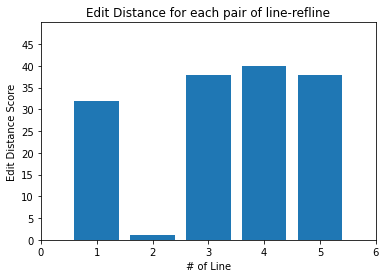

In [131]:
lines = [1, 2, 3, 4, 5]   

plt.bar(lines, score)

plt.xlabel("# of Line")
plt.ylabel("Edit Distance Score")
plt.axis([0,6,0,50]) # x: from 0 to 6, y: from 0 to 50
plt.yticks([i for i in range(0, 50, 5)]) # start 0, up to 50, with step 5
plt.title("Edit Distance for each pair of line-refline")

seq_db_file.close() 
ref_db_file.close()

## Random string generator
* random.randit(...): generate a random set of numbers in a range
* write(...): write data to a file

In [132]:
import random

lineNum=5
lineLength=80
filename='output.txt'
g=open(filename,'w') # open in order to write

chars=['A','T','G','C']
# 0 for A, 1 for T, 2 for G and 3 for C
# generate a random number X from the set [0,1,2,3], 
# and get the character by using chars[3]

for line in range (lineNum):
    randomLine=''
    for c in range(lineLength):
        randomIndex=random.randint(0,len(chars)-1) # this is a random number
        randomLetter=chars[randomIndex] # this is a random character
        randomLine+=randomLetter
    randomLine+='\n'
    g.write(randomLine)
g.close()